# FLIGHT PRICE PREDICTION



Time of purchase patterns (making sure last-minute purchases are expensive)
Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)
So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.



In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("/Users/pratiksingh/Desktop/Flight_Price_Data.csv")

In [3]:
df.head()

Airline_Names Departure_Time Arrival_Time Flight_Duration Source_Place  \
0      Air Asia          12:40        20:15          7h 35m    New Delhi   
1      Air Asia          11:55        20:15          8h 20m    New Delhi   
2      Air Asia          16:15        06:20         14h 05m    New Delhi   
3      Go First          18:50        20:45          1h 55m    New Delhi   
4      Go First          09:05        11:05          2h 00m    New Delhi   

  Destination_Place Meal_Availability Number_Of_Stops Flight_Prices  
0            Mumbai      No Meal Fare          1 Stop         5,953  
1            Mumbai      No Meal Fare          1 Stop         5,953  
2            Mumbai      No Meal Fare          1 Stop         5,953  
3            Mumbai      No Meal Fare        Non Stop         5,954  
4            Mumbai      No Meal Fare        Non Stop         5,954

# Exploratory Data Analysis (EDA)

In [4]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(10)

We have 5805 Rows and 9 Columns in our dataframe


Airline_Names Departure_Time Arrival_Time Flight_Duration Source_Place  \
0      Air Asia          12:40        20:15          7h 35m    New Delhi   
1      Air Asia          11:55        20:15          8h 20m    New Delhi   
2      Air Asia          16:15        06:20         14h 05m    New Delhi   
3      Go First          18:50        20:45          1h 55m    New Delhi   
4      Go First          09:05        11:05          2h 00m    New Delhi   
5      Go First          06:15        08:20          2h 05m    New Delhi   
6      Go First          14:20        16:25          2h 05m    New Delhi   
7      Go First          20:30        22:35          2h 05m    New Delhi   
8      Go First          22:45        01:00          2h 15m    New Delhi   
9      Go First          17:45        22:25          4h 40m    New Delhi   

  Destination_Place Meal_Availability Number_Of_Stops Flight_Prices  
0            Mumbai      No Meal Fare          1 Stop         5,953  
1            Mumbai      No Meal Fare          1 Stop         5,953  
2            Mumbai      No Meal Fare          1 Stop         5,953  
3            Mumbai      No Meal Fare        Non Stop         5,954  
4            Mumbai      No Meal Fare        Non Stop         5,954  
5            Mumbai         eCash 250        Non Stop         5,954  
6            Mumbai         eCash 250        Non Stop         5,954  
7            Mumbai         eCash 250        Non Stop         5,954  
8            Mumbai         eCash 250        Non Stop         5,954  
9            Mumbai      No Meal Fare          1 Stop         5,954

In [5]:
df.isna().sum() # checking for missing values

Airline_Names        0
Departure_Time       0
Arrival_Time         0
Flight_Duration      0
Source_Place         0
Destination_Place    0
Meal_Availability    0
Number_Of_Stops      0
Flight_Prices        0
dtype: int64

Great we have no missing values therefore we won't have to worry about handling missing data. However we will try to confirm the same information with a visual on it.

In [6]:
df.shape

(5805, 9)

In [7]:
print("Missing column values in percentage:")
for col in df:
    percentage = np.round((df[col].isnull().sum()/df.shape[0])*100, 6)
    print(col, ":".format(), percentage, '%')

Missing column values in percentage:
Airline_Names : 0.0 %
Departure_Time : 0.0 %
Arrival_Time : 0.0 %
Flight_Duration : 0.0 %
Source_Place : 0.0 %
Destination_Place : 0.0 %
Meal_Availability : 0.0 %
Number_Of_Stops : 0.0 %
Flight_Prices : 0.0 %


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5805 entries, 0 to 5804
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline_Names      5805 non-null   object
 1   Departure_Time     5805 non-null   object
 2   Arrival_Time       5805 non-null   object
 3   Flight_Duration    5805 non-null   object
 4   Source_Place       5805 non-null   object
 5   Destination_Place  5805 non-null   object
 6   Meal_Availability  5805 non-null   object
 7   Number_Of_Stops    5805 non-null   object
 8   Flight_Prices      5805 non-null   object
dtypes: object(9)
memory usage: 408.3+ KB


In [9]:
df.nunique().sort_values().to_frame("Unique Values")

Unique Values
Meal_Availability              3
Number_Of_Stops                5
Airline_Names                  6
Source_Place                   9
Destination_Place              9
Departure_Time               223
Arrival_Time                 232
Flight_Duration              409
Flight_Prices               1571

In [10]:
value = ["Meal_Availability", "Number_Of_Stops", "Airline_Names", "Source_Place", "Destination_Place"]
for col in value:
    print(col)
    print(df[col].value_counts())
    print("-"*100)

Meal_Availability
No Meal Fare    4252
Free Meal       1014
eCash 250        539
Name: Meal_Availability, dtype: int64
----------------------------------------------------------------------------------------------------
Number_Of_Stops
1 Stop       3696
2 Stop(s)    1154
Non Stop      693
3 Stop(s)     244
4 Stop(s)      18
Name: Number_Of_Stops, dtype: int64
----------------------------------------------------------------------------------------------------
Airline_Names
IndiGo       1782
Air India    1638
Vistara      1514
Go First      492
Air Asia      213
SpiceJet      166
Name: Airline_Names, dtype: int64
----------------------------------------------------------------------------------------------------
Source_Place
Mumbai       806
Bangalore    755
New Delhi    748
Kolkata      744
Hyderabad    614
Goa          612
Chennai      580
Lucknow      519
Jaipur       427
Name: Source_Place, dtype: int64
---------------------------------------------------------------------------------

# Data Preprocessing

In [11]:
# Meal_Availability 

df.Meal_Availability.replace({"No Meal Fare": "No Meals", "Free Meal": "Free Meals", "eCash 250": "eCash Meals"}, 
                             inplace = True)
df["Meal_Availability"].value_counts()

No Meals       4252
Free Meals     1014
eCash Meals     539
Name: Meal_Availability, dtype: int64

In [12]:
# Number_Of_Stops

df.Number_Of_Stops.replace({"Non Stop": 0, "1 Stop": 1, "2 Stop(s)": 2, "3 Stop(s)": 3, "4 Stop(s)": 4}, 
                           inplace = True)
df["Number_Of_Stops"].value_counts()

1    3696
2    1154
0     693
3     244
4      18
Name: Number_Of_Stops, dtype: int64

In [13]:
df

Airline_Names Departure_Time Arrival_Time Flight_Duration Source_Place  \
0         Air Asia          12:40        20:15          7h 35m    New Delhi   
1         Air Asia          11:55        20:15          8h 20m    New Delhi   
2         Air Asia          16:15        06:20         14h 05m    New Delhi   
3         Go First          18:50        20:45          1h 55m    New Delhi   
4         Go First          09:05        11:05          2h 00m    New Delhi   
...            ...            ...          ...             ...          ...   
5800     Air India          08:55        08:20         23h 25m      Lucknow   
5801     Air India          08:55        09:20         24h 25m      Lucknow   
5802     Air India          14:45        09:20         18h 35m      Lucknow   
5803     Air India          08:55        09:20         24h 25m      Lucknow   
5804     Air India          15:30        09:20         17h 50m      Lucknow   

     Destination_Place Meal_Availability  Number_Of_Stops Flight_Prices  
0               Mumbai          No Meals                1         5,953  
1               Mumbai          No Meals                1         5,953  
2               Mumbai          No Meals                1         5,953  
3               Mumbai          No Meals                0         5,954  
4               Mumbai          No Meals                0         5,954  
...                ...               ...              ...           ...  
5800            Jaipur          No Meals                1         9,302  
5801            Jaipur          No Meals                2        16,287  
5802            Jaipur          No Meals                2        16,865  
5803            Jaipur          No Meals                2        16,865  
5804            Jaipur        Free Meals                3        19,749  

[5805 rows x 9 columns]

In [14]:
# Departure_Time

df["Dep_Hour"] = pd.to_datetime(df.Departure_Time, format="%H:%M").dt.hour
df["Dep_Min"] = pd.to_datetime(df.Departure_Time, format="%H:%M").dt.minute
df["Departure_Time"] = df['Dep_Hour'] + df['Dep_Min'] / 60
#df.drop(columns = ['Dep_Hour','Dep_Min'], inplace=True) 
df.head()

Airline_Names  Departure_Time Arrival_Time Flight_Duration Source_Place  \
0      Air Asia       12.666667        20:15          7h 35m    New Delhi   
1      Air Asia       11.916667        20:15          8h 20m    New Delhi   
2      Air Asia       16.250000        06:20         14h 05m    New Delhi   
3      Go First       18.833333        20:45          1h 55m    New Delhi   
4      Go First        9.083333        11:05          2h 00m    New Delhi   

  Destination_Place Meal_Availability  Number_Of_Stops Flight_Prices  \
0            Mumbai          No Meals                1         5,953   
1            Mumbai          No Meals                1         5,953   
2            Mumbai          No Meals                1         5,953   
3            Mumbai          No Meals                0         5,954   
4            Mumbai          No Meals                0         5,954   

   Dep_Hour  Dep_Min  
0        12       40  
1        11       55  
2        16       15  
3        18       50  
4         9        5

In [15]:
# Arrival_Time

df["Arr_Hour"] = pd.to_datetime(df.Arrival_Time, format="%H:%M").dt.hour
df["Arr_Min"] = pd.to_datetime(df.Arrival_Time, format="%H:%M").dt.minute
df["Arrival_Time"] = df['Arr_Hour'] + df['Arr_Min'] / 60
#df.drop(columns = ['Arr_Hour','Arr_Min'], inplace=True)  
df.head()

Airline_Names  Departure_Time  Arrival_Time Flight_Duration Source_Place  \
0      Air Asia       12.666667     20.250000          7h 35m    New Delhi   
1      Air Asia       11.916667     20.250000          8h 20m    New Delhi   
2      Air Asia       16.250000      6.333333         14h 05m    New Delhi   
3      Go First       18.833333     20.750000          1h 55m    New Delhi   
4      Go First        9.083333     11.083333          2h 00m    New Delhi   

  Destination_Place Meal_Availability  Number_Of_Stops Flight_Prices  \
0            Mumbai          No Meals                1         5,953   
1            Mumbai          No Meals                1         5,953   
2            Mumbai          No Meals                1         5,953   
3            Mumbai          No Meals                0         5,954   
4            Mumbai          No Meals                0         5,954   

   Dep_Hour  Dep_Min  Arr_Hour  Arr_Min  
0        12       40        20       15  
1        11       55        20       15  
2        16       15         6       20  
3        18       50        20       45  
4         9        5        11        5

In [16]:
# Flight_Duration

df["FD_Hour"] = df.Flight_Duration.str.split('h').str.get(0)
df["FD_Min"] = df.Flight_Duration.str.split('h').str.get(1)
df["FD_Min"] = df["FD_Min"].str.split('m').str.get(0)
df["FD_Hour"] = df['FD_Hour'].astype('float')
df["FD_Min"] = df['FD_Min'].astype('float')
df["Flight_Duration"] = df["FD_Hour"] + df["FD_Min"] / 60
#df.drop(columns = ["FD_Hour","FD_Min"], inplace=True)
df.head()

Airline_Names  Departure_Time  Arrival_Time  Flight_Duration Source_Place  \
0      Air Asia       12.666667     20.250000         7.583333    New Delhi   
1      Air Asia       11.916667     20.250000         8.333333    New Delhi   
2      Air Asia       16.250000      6.333333        14.083333    New Delhi   
3      Go First       18.833333     20.750000         1.916667    New Delhi   
4      Go First        9.083333     11.083333         2.000000    New Delhi   

  Destination_Place Meal_Availability  Number_Of_Stops Flight_Prices  \
0            Mumbai          No Meals                1         5,953   
1            Mumbai          No Meals                1         5,953   
2            Mumbai          No Meals                1         5,953   
3            Mumbai          No Meals                0         5,954   
4            Mumbai          No Meals                0         5,954   

   Dep_Hour  Dep_Min  Arr_Hour  Arr_Min  FD_Hour  FD_Min  
0        12       40        20       15      7.0    35.0  
1        11       55        20       15      8.0    20.0  
2        16       15         6       20     14.0     5.0  
3        18       50        20       45      1.0    55.0  
4         9        5        11        5      2.0     0.0

In [17]:
# Flight_Prices

df['Flight_Prices'] = df['Flight_Prices'].str.replace(',','')
df['Flight_Prices'] = df['Flight_Prices'].astype('float')
df

Airline_Names  Departure_Time  Arrival_Time  Flight_Duration  \
0         Air Asia       12.666667     20.250000         7.583333   
1         Air Asia       11.916667     20.250000         8.333333   
2         Air Asia       16.250000      6.333333        14.083333   
3         Go First       18.833333     20.750000         1.916667   
4         Go First        9.083333     11.083333         2.000000   
...            ...             ...           ...              ...   
5800     Air India        8.916667      8.333333        23.416667   
5801     Air India        8.916667      9.333333        24.416667   
5802     Air India       14.750000      9.333333        18.583333   
5803     Air India        8.916667      9.333333        24.416667   
5804     Air India       15.500000      9.333333        17.833333   

     Source_Place Destination_Place Meal_Availability  Number_Of_Stops  \
0       New Delhi            Mumbai          No Meals                1   
1       New Delhi            Mumbai          No Meals                1   
2       New Delhi            Mumbai          No Meals                1   
3       New Delhi            Mumbai          No Meals                0   
4       New Delhi            Mumbai          No Meals                0   
...           ...               ...               ...              ...   
5800      Lucknow            Jaipur          No Meals                1   
5801      Lucknow            Jaipur          No Meals                2   
5802      Lucknow            Jaipur          No Meals                2   
5803      Lucknow            Jaipur          No Meals                2   
5804      Lucknow            Jaipur        Free Meals                3   

      Flight_Prices  Dep_Hour  Dep_Min  Arr_Hour  Arr_Min  FD_Hour  FD_Min  
0            5953.0        12       40        20       15      7.0    35.0  
1            5953.0        11       55        20       15      8.0    20.0  
2            5953.0        16       15         6       20     14.0     5.0  
3            5954.0        18       50        20       45      1.0    55.0  
4            5954.0         9        5        11        5      2.0     0.0  
...             ...       ...      ...       ...      ...      ...     ...  
5800         9302.0         8       55         8       20     23.0    25.0  
5801        16287.0         8       55         9       20     24.0    25.0  
5802        16865.0        14       45         9       20     18.0    35.0  
5803        16865.0         8       55         9       20     24.0    25.0  
5804        19749.0        15       30         9       20     17.0    50.0  

[5805 rows x 15 columns]

In [18]:
df.dtypes

Airline_Names         object
Departure_Time       float64
Arrival_Time         float64
Flight_Duration      float64
Source_Place          object
Destination_Place     object
Meal_Availability     object
Number_Of_Stops        int64
Flight_Prices        float64
Dep_Hour               int64
Dep_Min                int64
Arr_Hour               int64
Arr_Min                int64
FD_Hour              float64
FD_Min               float64
dtype: object

In [19]:
df.describe(include="all").T

count unique       top  freq         mean          std  \
Airline_Names        5805      6    IndiGo  1782          NaN          NaN   
Departure_Time     5805.0    NaN       NaN   NaN    13.024591     4.887243   
Arrival_Time       5805.0    NaN       NaN   NaN    15.823572     5.543619   
Flight_Duration    5805.0    NaN       NaN   NaN    12.452728     8.137841   
Source_Place         5805      9    Mumbai   806          NaN          NaN   
Destination_Place    5805      9    Mumbai   805          NaN          NaN   
Meal_Availability    5805      3  No Meals  4252          NaN          NaN   
Number_Of_Stops    5805.0    NaN       NaN   NaN     1.172782     0.696018   
Flight_Prices      5805.0    NaN       NaN   NaN  10046.68062  3667.752804   
Dep_Hour           5805.0    NaN       NaN   NaN    12.585185     4.881136   
Dep_Min            5805.0    NaN       NaN   NaN    26.364341    17.288619   
Arr_Hour           5805.0    NaN       NaN   NaN    15.332472     5.526615   
Arr_Min            5805.0    NaN       NaN   NaN    29.465978    17.493203   
FD_Hour            5805.0    NaN       NaN   NaN     12.00379     8.137239   
FD_Min             5805.0    NaN       NaN   NaN    26.936262    17.047469   

                        min       25%        50%        75%        max  
Airline_Names           NaN       NaN        NaN        NaN        NaN  
Departure_Time     0.583333  8.916667  12.916667  16.833333  23.416667  
Arrival_Time       0.083333      11.5  16.666667  20.416667  23.916667  
Flight_Duration    0.833333  6.333333      10.25  17.833333  41.083333  
Source_Place            NaN       NaN        NaN        NaN        NaN  
Destination_Place       NaN       NaN        NaN        NaN        NaN  
Meal_Availability       NaN       NaN        NaN        NaN        NaN  
Number_Of_Stops         0.0       1.0        1.0        1.0        4.0  
Flight_Prices        3361.0    7425.0     9747.0    12249.0    38348.0  
Dep_Hour                0.0       8.0       12.0       16.0       23.0  
Dep_Min                 0.0      10.0       25.0       40.0       55.0  
Arr_Hour                0.0      11.0       16.0       20.0       23.0  
Arr_Min                 0.0      15.0       30.0       45.0       55.0  
FD_Hour                 0.0       6.0       10.0       17.0       41.0  
FD_Min                  0.0      10.0       25.0       40.0       55.0

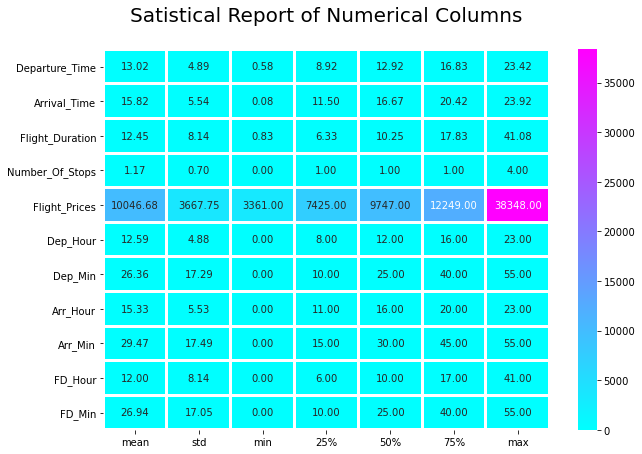

In [20]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".2f", cmap="cool")
plt.title("Satistical Report of Numerical Columns\n", fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

# Visualization

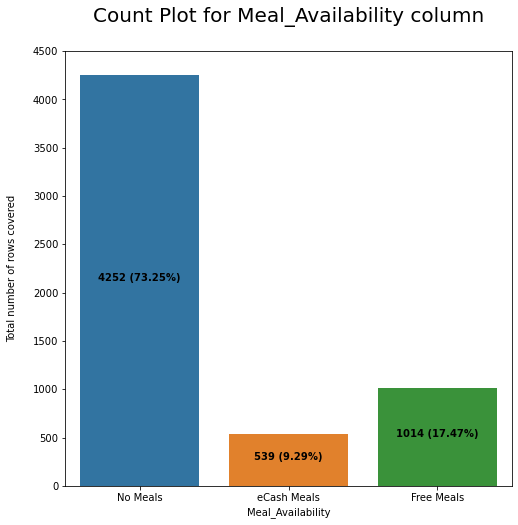

In [21]:
try:
    x = 'Meal_Availability'
    k=0
    plt.figure(figsize=[8,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,4500)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation:

There are 73.25% flights that mostly serve no meals in their domestic journey since they are of short distances and duration.

We can see that 17.47% flights serve free meals which are probably for tickets that include those prices and meal services.

Finally there are 9.29% flights which offer the eCash meals option that can be redeemed to purchase food during long journey flights mostly with multiple stops.

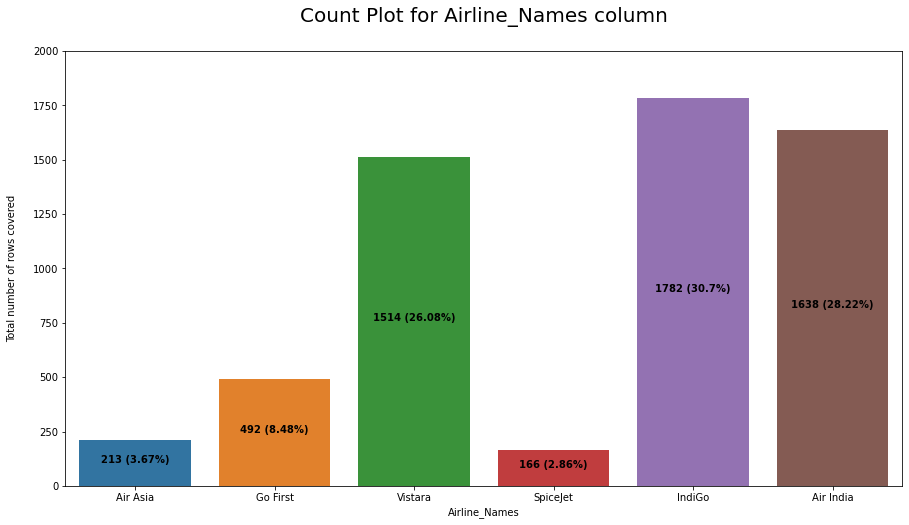

In [22]:
try:
    x = 'Airline_Names'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,2000)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation:

Highest number of airline preferred by people are Indigo covering 30.7% of the total record.

We can see that Air India is quite close to the first one and a close competitor standing at the second position holding 28.22% of the total record.

At third place we have Vistara airlines that covers 26.08% of total record in our airline data.

Airlines Go First, Air Asia and SpiceJet are the least used by people covering 8.48%, 3.67% and 2.86% respectively.

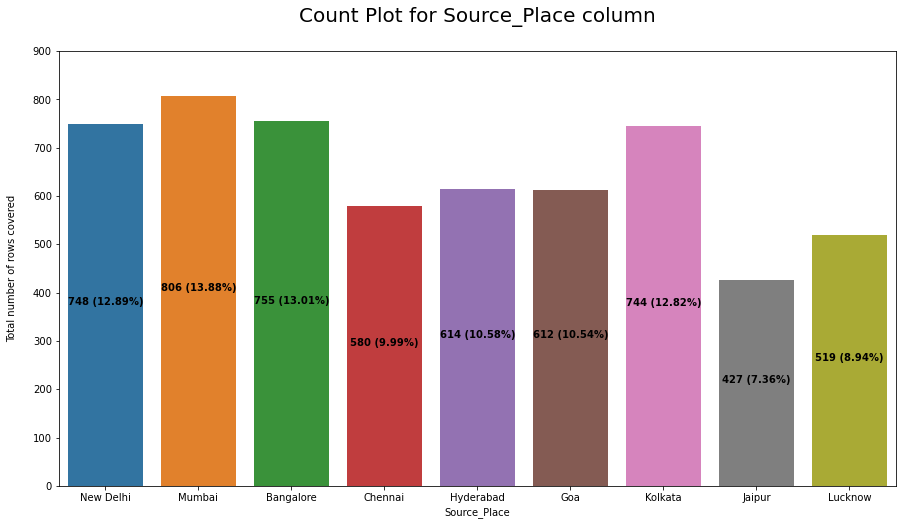

In [23]:
try:
    x = 'Source_Place'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,900)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation:

The departure area or source place highly used or people majorly flying from the city is "Mumbai" covering 13.88% record in the column.

We see that "Bangalore" is a close second wherein it covers 13.01% records in the column.

Other two famous locations where people chose to fly from are "New Delhi" and "Kolkata" covering 12.89% and 12.82% respectively.

The least travel from location is "Jaipur" where I believe not many people chose to travel from unless they are returning from a vacation there and hence covers 7.36% of record in the column

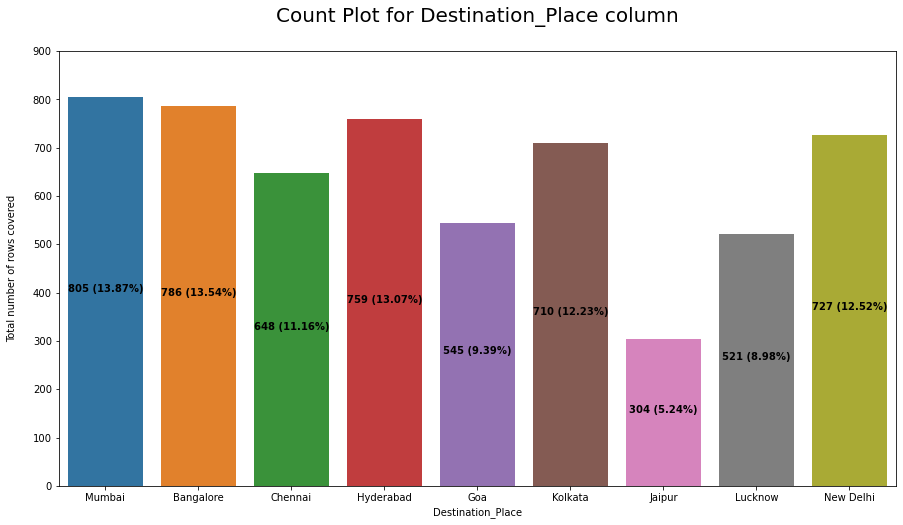

In [24]:
try:
    x = 'Destination_Place'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,900)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation:

Just as in case of departure area even in terms of arrival area or destination place people prefer to fly towards the city "Mumbai" covering 13.87% of record.

Again in a similar fashion "Bangalore" city is a close second destination that people like to fly towards covering 13.54% record in the column.

Surprisingly we have "Hyderabad" city taking the third place for destination that people pefer landing covering 13.07% of record.

Finally similar to the departure location the least travel to area is "Jaipur" and it covers 5.24% record in the column



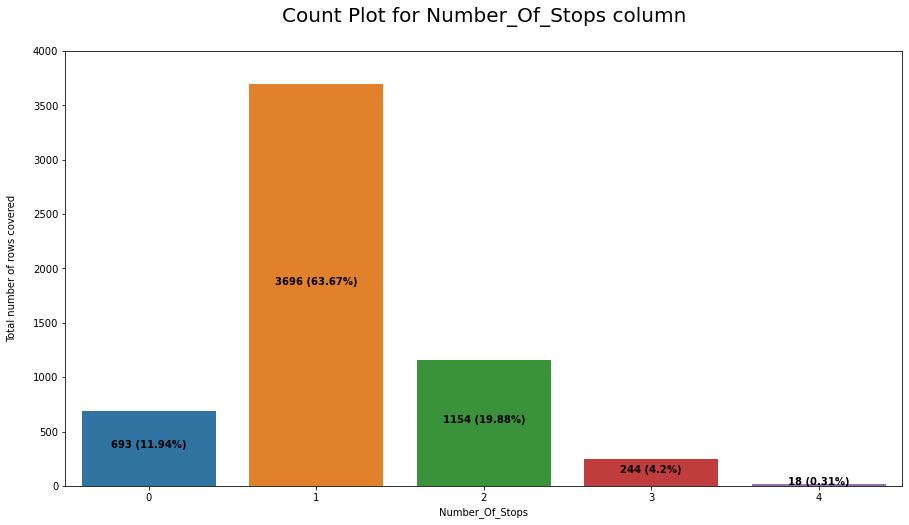

In [25]:
try:
    x = 'Number_Of_Stops'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,4000)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation:

People gnerally buy flight tickets that have 1 stop layover covering 63.67% rows in the column.

Next in line are 2 stop layovers which cover 19.88% rows.

Here we can see that the 0 stop flights availability is around 11.94% of the total record.

In domestic flight we rarely see 3 or 4 stop layovers and therefore they cover 4.2% and 0.31% of total rows in the column respectively

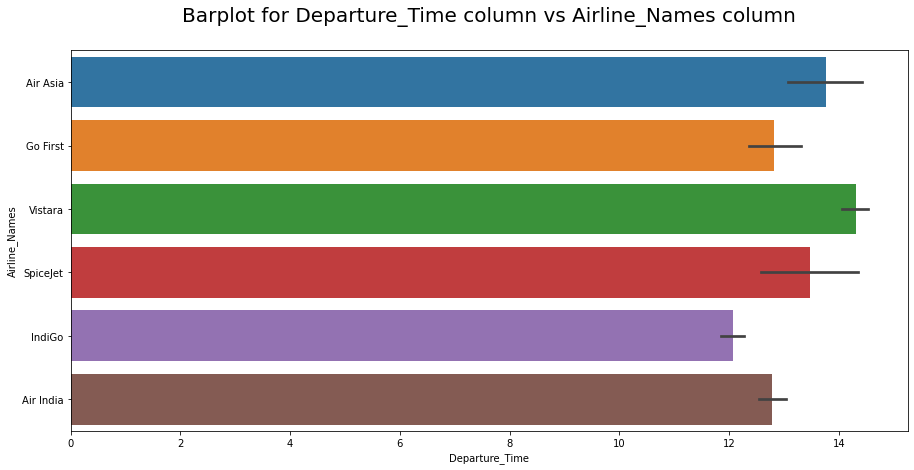

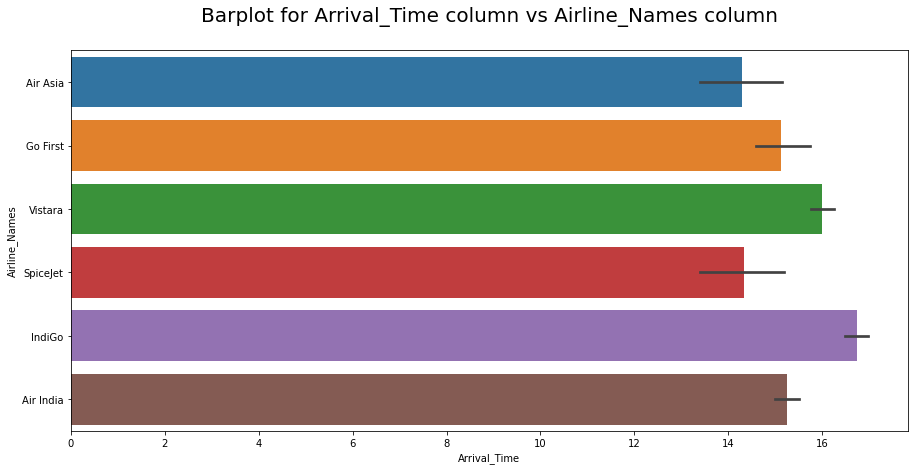

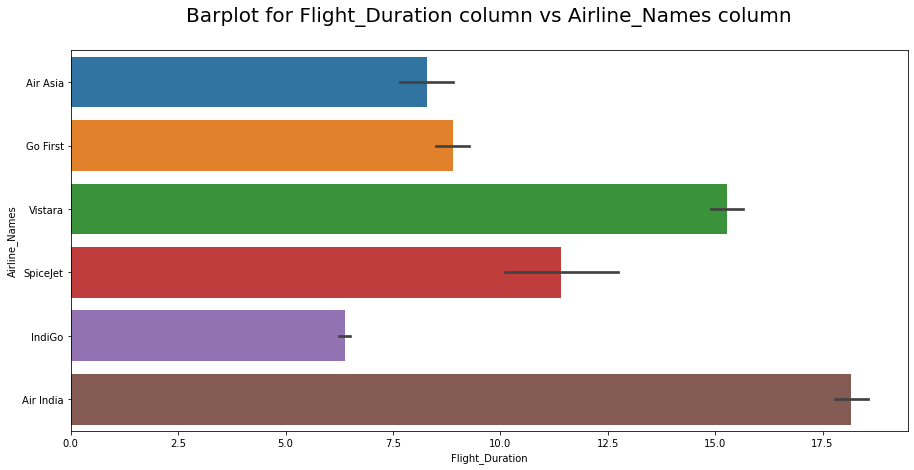

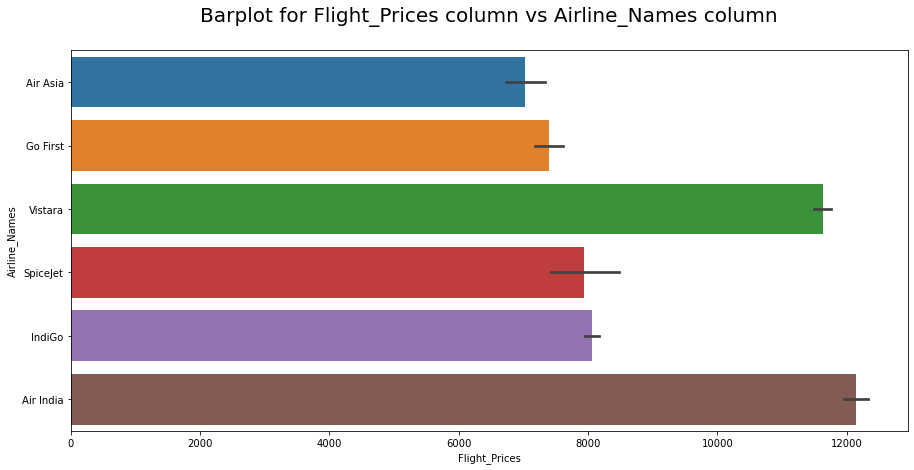

In [26]:
y = 'Airline_Names'

x = 'Departure_Time'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'Arrival_Time'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'Flight_Duration'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'Flight_Prices'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

Observation:

When we observe the barplot for Departure time vs Airline we can see that Air Asia has the highest departure time while IndiGo has the lowest departure time.

Considering the barplot for Arrival time vs Airline we can see that IndiGo has the highest arrival time while Air Asia and SpiceJet have the lowest arrival time.

Taking a look at the barplot for Flight duration vs Airline we observe that Ai India has the highest flight duration while Indigo has the lowest flight duration collectively.

Comparing the barplots for Flight prices vs Airline we can clearly see that Vistara and Air India have very high flight prices while the other airlines IndiGo, SpiceJet, Go First and Air Asia lie in a similar price bracket where Air Asia has the lowest fare

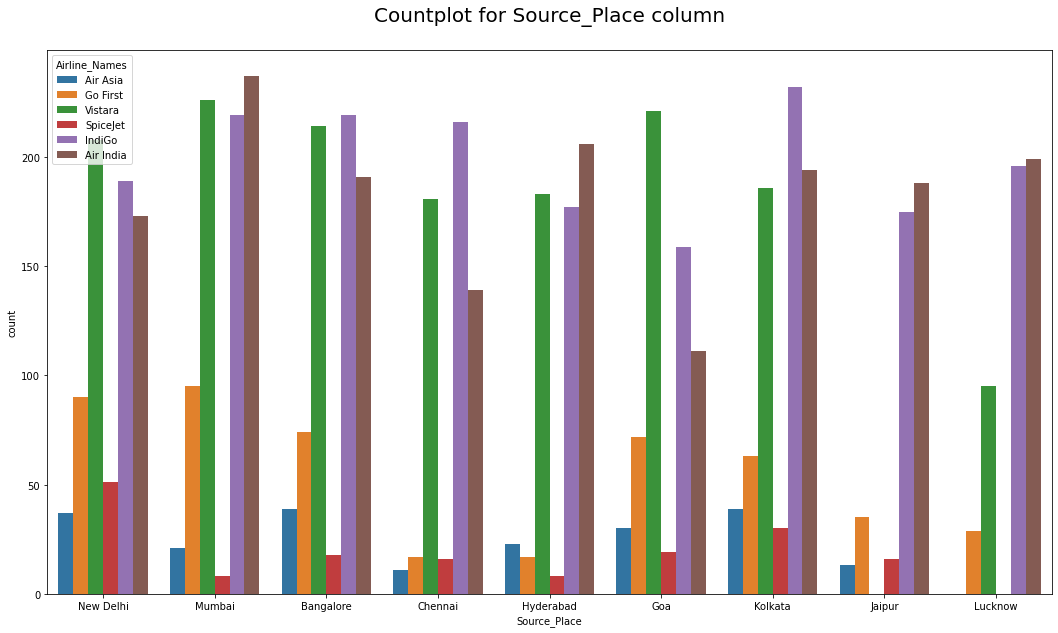

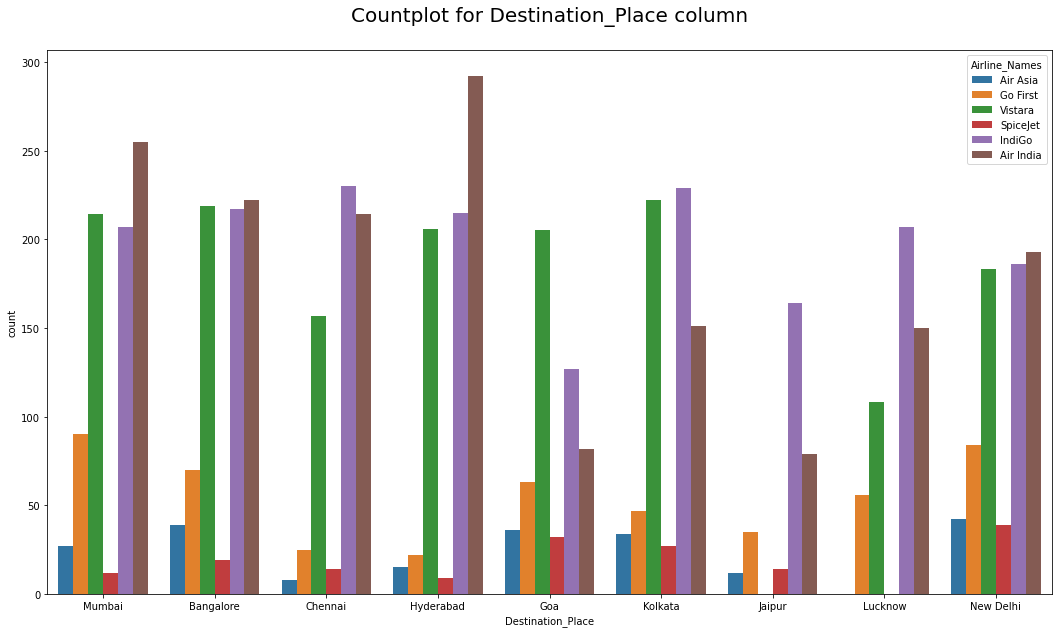

In [27]:
x = "Source_Place"
plt.figure(figsize=(18,10))
sns.countplot(x = x, hue = "Airline_Names", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

x = "Destination_Place"
plt.figure(figsize=(18,10))
sns.countplot(x = x, hue = "Airline_Names", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

Observation:

Checking out the Source place details for each and every airline we can see that Mumbai city has the highest number of departure flights for Air India airlines.

Go First, Indigo and Air India are the airlines that are used in almost all the cities to depart while the other airlines do not cover some or the other city.

Looking at the Destination place details for each and every airline we can see that Hyderabad city has the highest number of arrival flights for Air India airlines.

Once again we can observe that Go First, Indigo and Air India are the leading airlines that are used in almost all cities to arrive while the other airlines miss out on some or the other regions.

Overall I can notice that Air India and Indigo flights do quite well and can be used for arrival and departure to and from any location in India

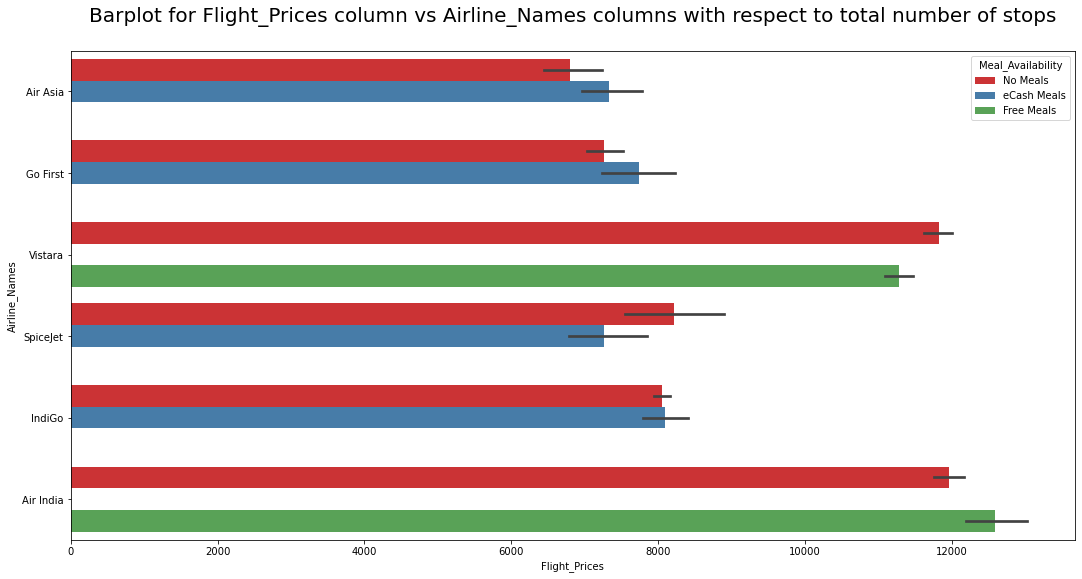

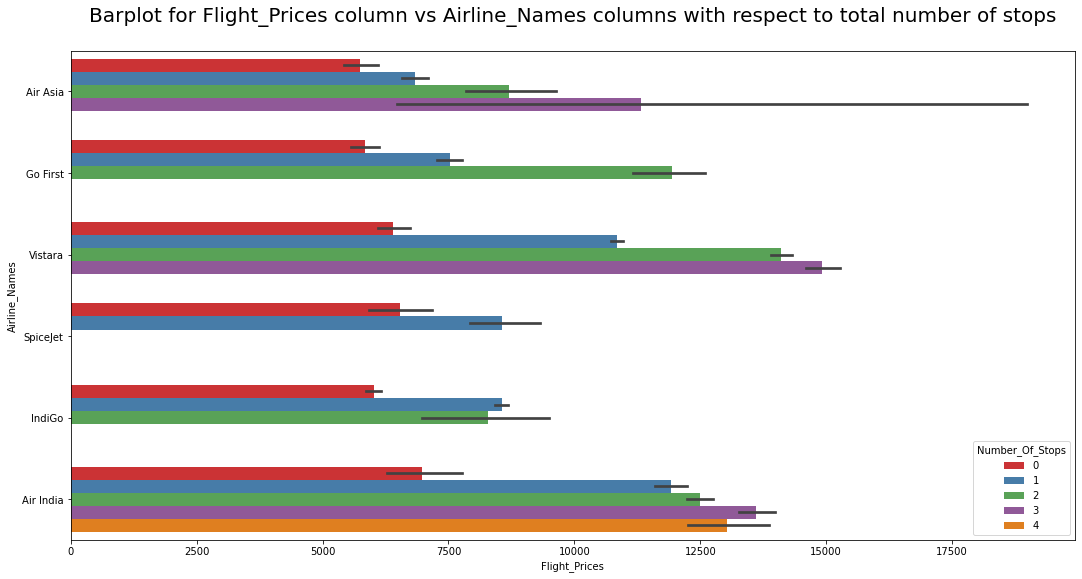

In [28]:
x = "Flight_Prices"
y = "Airline_Names"

plt.figure(figsize=(18,9))
sns.barplot(x=df[x], y=df[y], hue=df['Meal_Availability'], palette="Set1")
plt.title(f"Barplot for {x} column vs {y} columns with respect to total number of stops\n", fontsize = 20)
plt.show()

plt.figure(figsize=(18,9))
sns.barplot(x=df[x], y=df[y], hue=df['Number_Of_Stops'], palette="Set1")
plt.title(f"Barplot for {x} column vs {y} columns with respect to total number of stops\n", fontsize = 20)
plt.show()

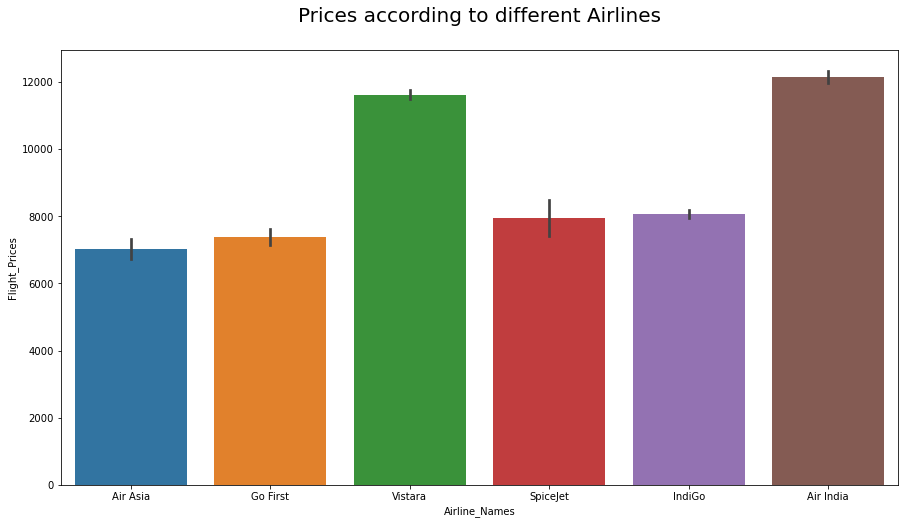

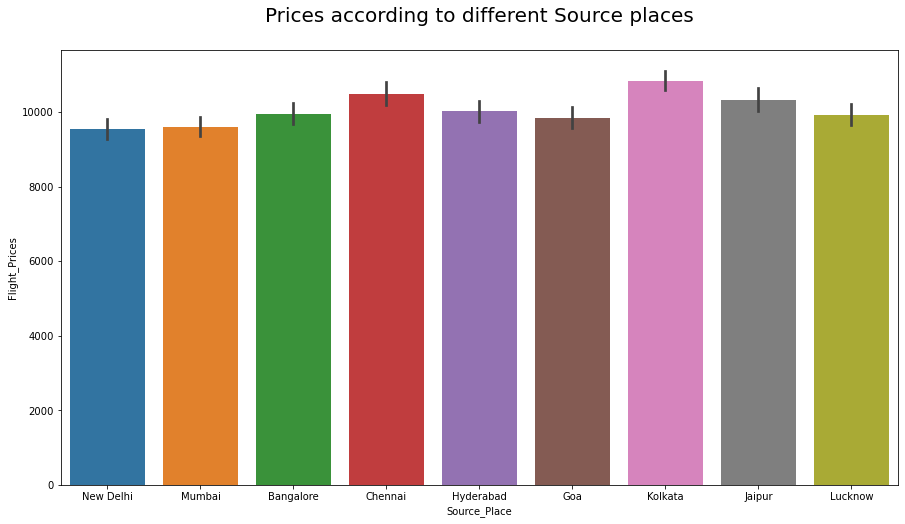

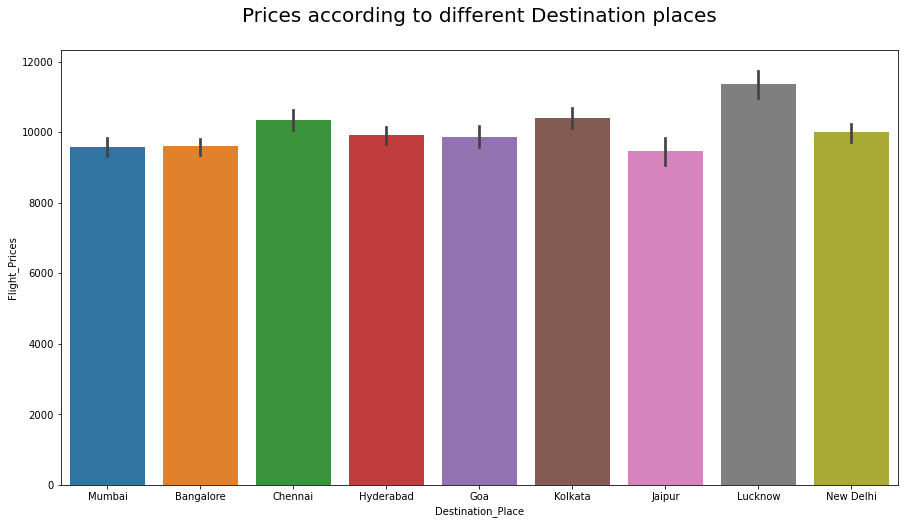

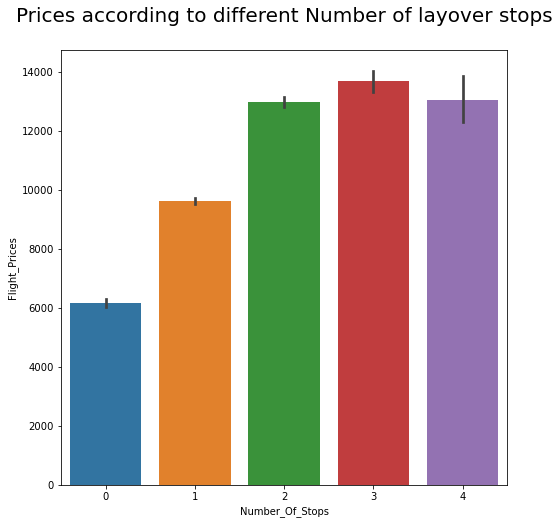

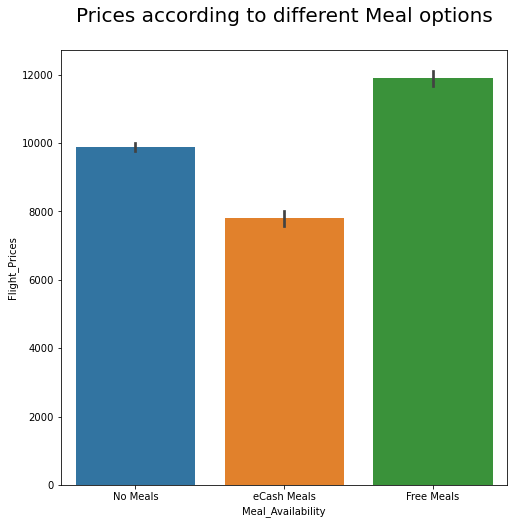

In [29]:
y = "Flight_Prices"

x = "Airline_Names"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Airlines\n", fontsize = 20)
plt.show()

x = "Source_Place"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Source places\n", fontsize = 20)
plt.show()

x = "Destination_Place"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Destination places\n", fontsize = 20)
plt.show()

x = "Number_Of_Stops"
plt.figure(figsize = (8,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Number of layover stops\n", fontsize = 20)
plt.show()

x = "Meal_Availability"
plt.figure(figsize = (8,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Meal options\n", fontsize = 20)
plt.show()

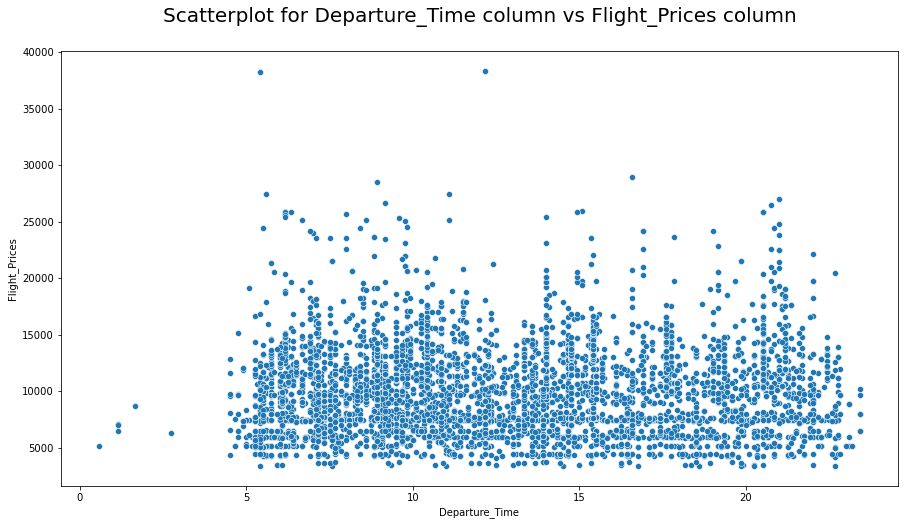

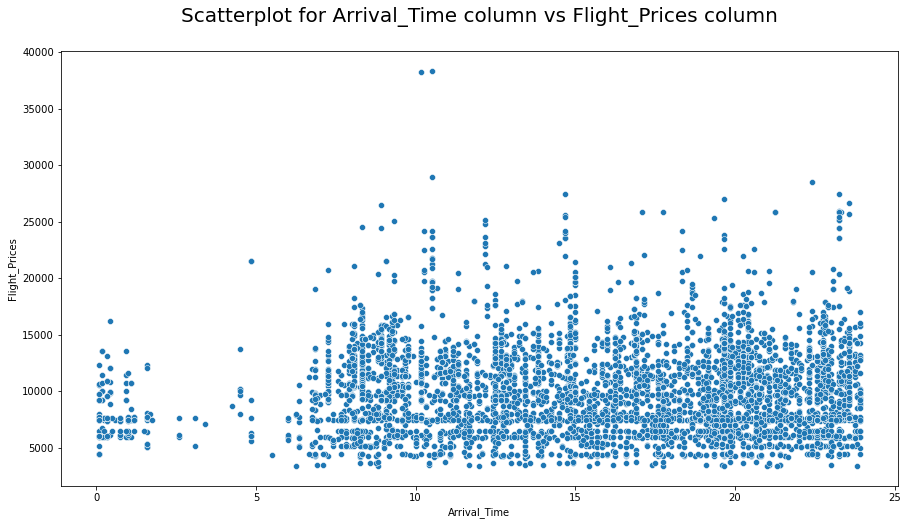

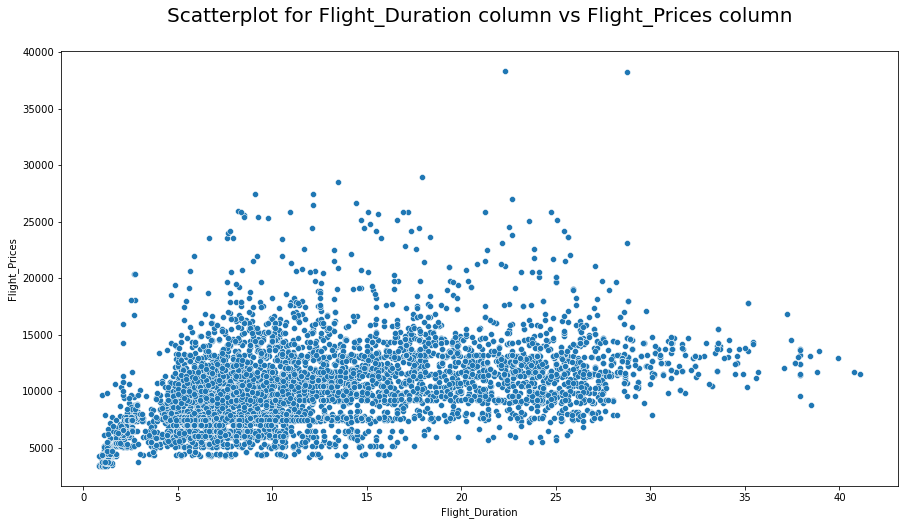

In [30]:
y = "Flight_Prices"

x = "Departure_Time"
plt.figure(figsize = (15,8))
sns.scatterplot(x=x,y=y,data=df)
plt.title(f"Scatterplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = "Arrival_Time"
plt.figure(figsize = (15,8))
sns.scatterplot(x=x,y=y,data=df)
plt.title(f"Scatterplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = "Flight_Duration"
plt.figure(figsize = (15,8))
sns.scatterplot(x=x,y=y,data=df)
plt.title(f"Scatterplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

------------------------- Pair Plot with Meal Type Legend -----------------------------------


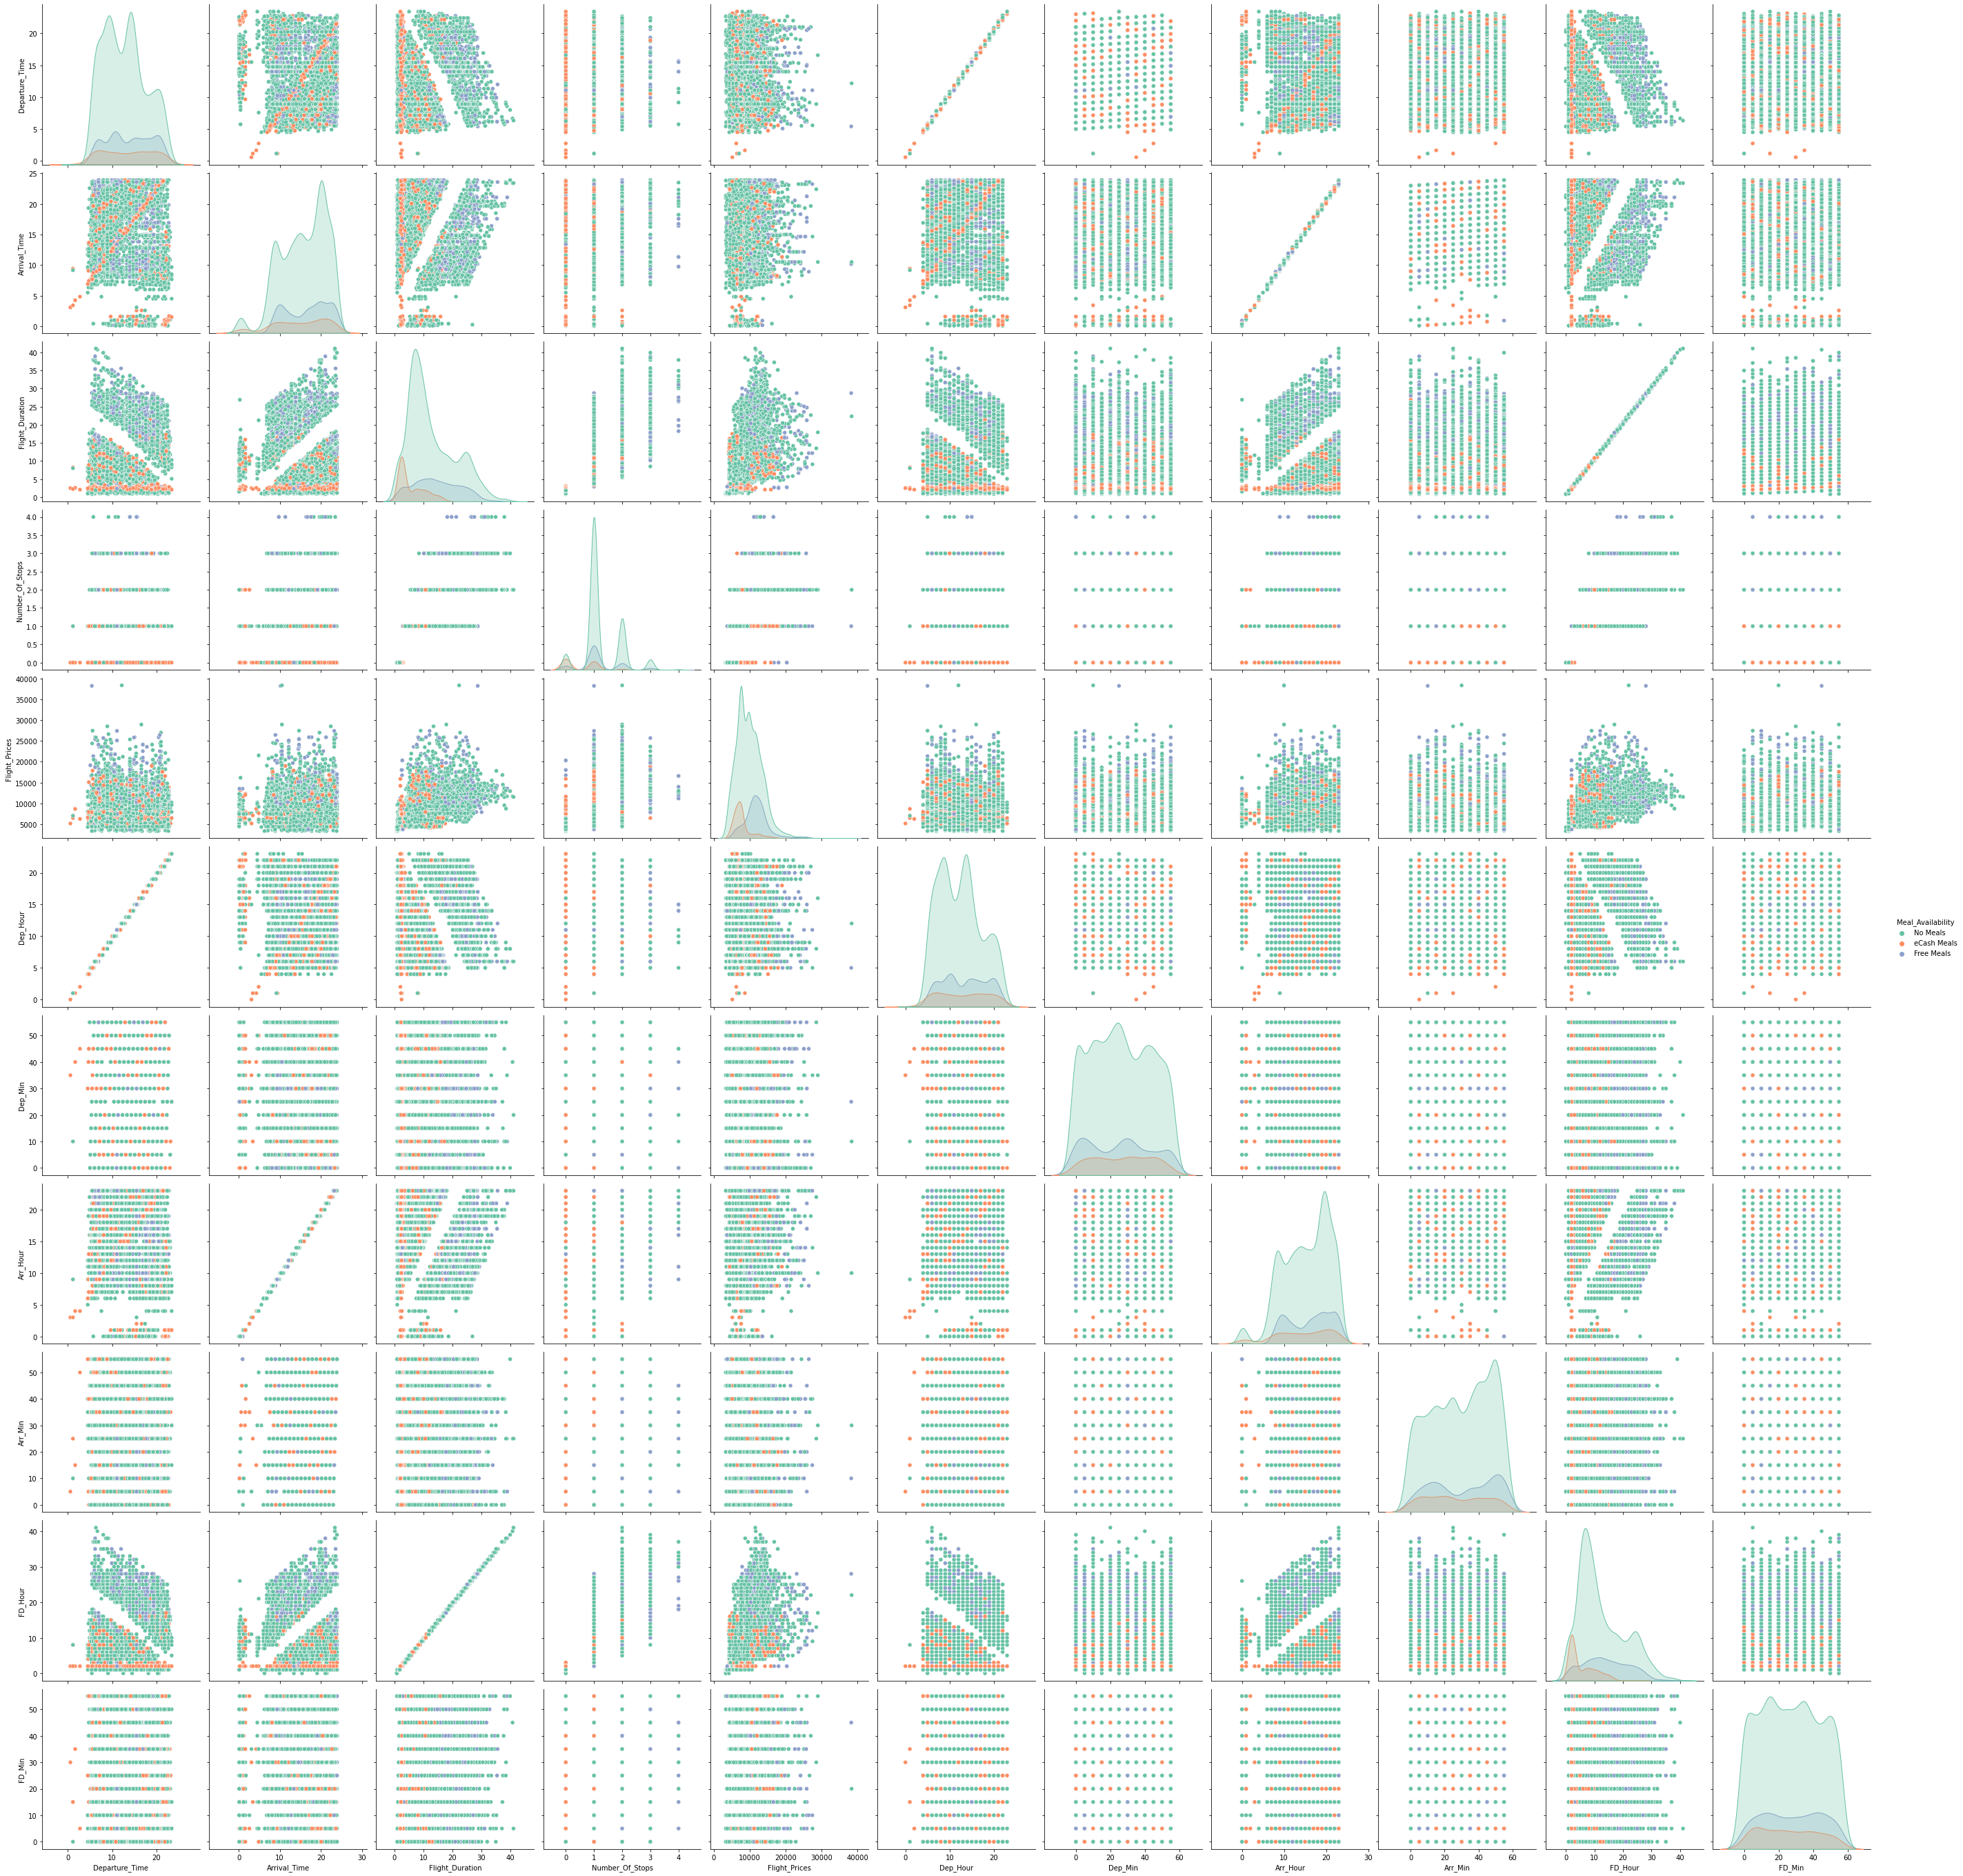

In [31]:
print("------------------------- Pair Plot with Meal Type Legend -----------------------------------")
sns.pairplot(df, hue='Meal_Availability', diag_kind="kde", kind="scatter", palette="Set2", height=3.5)
plt.show()

In [32]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

column=["Meal_Availability", "Airline_Names", "Source_Place", "Destination_Place"]
df=ordinal_encode(df, column)
df

Airline_Names  Departure_Time  Arrival_Time  Flight_Duration  \
0               0.0       12.666667     20.250000         7.583333   
1               0.0       11.916667     20.250000         8.333333   
2               0.0       16.250000      6.333333        14.083333   
3               2.0       18.833333     20.750000         1.916667   
4               2.0        9.083333     11.083333         2.000000   
...             ...             ...           ...              ...   
5800            1.0        8.916667      8.333333        23.416667   
5801            1.0        8.916667      9.333333        24.416667   
5802            1.0       14.750000      9.333333        18.583333   
5803            1.0        8.916667      9.333333        24.416667   
5804            1.0       15.500000      9.333333        17.833333   

      Source_Place  Destination_Place  Meal_Availability  Number_Of_Stops  \
0              8.0                7.0                1.0                1   
1              8.0                7.0                1.0                1   
2              8.0                7.0                1.0                1   
3              8.0                7.0                1.0                0   
4              8.0                7.0                1.0                0   
...            ...                ...                ...              ...   
5800           6.0                4.0                1.0                1   
5801           6.0                4.0                1.0                2   
5802           6.0                4.0                1.0                2   
5803           6.0                4.0                1.0                2   
5804           6.0                4.0                0.0                3   

      Flight_Prices  Dep_Hour  Dep_Min  Arr_Hour  Arr_Min  FD_Hour  FD_Min  
0            5953.0        12       40        20       15      7.0    35.0  
1            5953.0        11       55        20       15      8.0    20.0  
2            5953.0        16       15         6       20     14.0     5.0  
3            5954.0        18       50        20       45      1.0    55.0  
4            5954.0         9        5        11        5      2.0     0.0  
...             ...       ...      ...       ...      ...      ...     ...  
5800         9302.0         8       55         8       20     23.0    25.0  
5801        16287.0         8       55         9       20     24.0    25.0  
5802        16865.0        14       45         9       20     18.0    35.0  
5803        16865.0         8       55         9       20     24.0    25.0  
5804        19749.0        15       30         9       20     17.0    50.0  

[5805 rows x 15 columns]

In [33]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(df.shape[0], df.shape[1]))
df

Shape of our data frame post encoding shows 5805 Rows and 15 columns



Airline_Names  Departure_Time  Arrival_Time  Flight_Duration  \
0               0.0       12.666667     20.250000         7.583333   
1               0.0       11.916667     20.250000         8.333333   
2               0.0       16.250000      6.333333        14.083333   
3               2.0       18.833333     20.750000         1.916667   
4               2.0        9.083333     11.083333         2.000000   
...             ...             ...           ...              ...   
5800            1.0        8.916667      8.333333        23.416667   
5801            1.0        8.916667      9.333333        24.416667   
5802            1.0       14.750000      9.333333        18.583333   
5803            1.0        8.916667      9.333333        24.416667   
5804            1.0       15.500000      9.333333        17.833333   

      Source_Place  Destination_Place  Meal_Availability  Number_Of_Stops  \
0              8.0                7.0                1.0                1   
1              8.0                7.0                1.0                1   
2              8.0                7.0                1.0                1   
3              8.0                7.0                1.0                0   
4              8.0                7.0                1.0                0   
...            ...                ...                ...              ...   
5800           6.0                4.0                1.0                1   
5801           6.0                4.0                1.0                2   
5802           6.0                4.0                1.0                2   
5803           6.0                4.0                1.0                2   
5804           6.0                4.0                0.0                3   

      Flight_Prices  Dep_Hour  Dep_Min  Arr_Hour  Arr_Min  FD_Hour  FD_Min  
0            5953.0        12       40        20       15      7.0    35.0  
1            5953.0        11       55        20       15      8.0    20.0  
2            5953.0        16       15         6       20     14.0     5.0  
3            5954.0        18       50        20       45      1.0    55.0  
4            5954.0         9        5        11        5      2.0     0.0  
...             ...       ...      ...       ...      ...      ...     ...  
5800         9302.0         8       55         8       20     23.0    25.0  
5801        16287.0         8       55         9       20     24.0    25.0  
5802        16865.0        14       45         9       20     18.0    35.0  
5803        16865.0         8       55         9       20     24.0    25.0  
5804        19749.0        15       30         9       20     17.0    50.0  

[5805 rows x 15 columns]

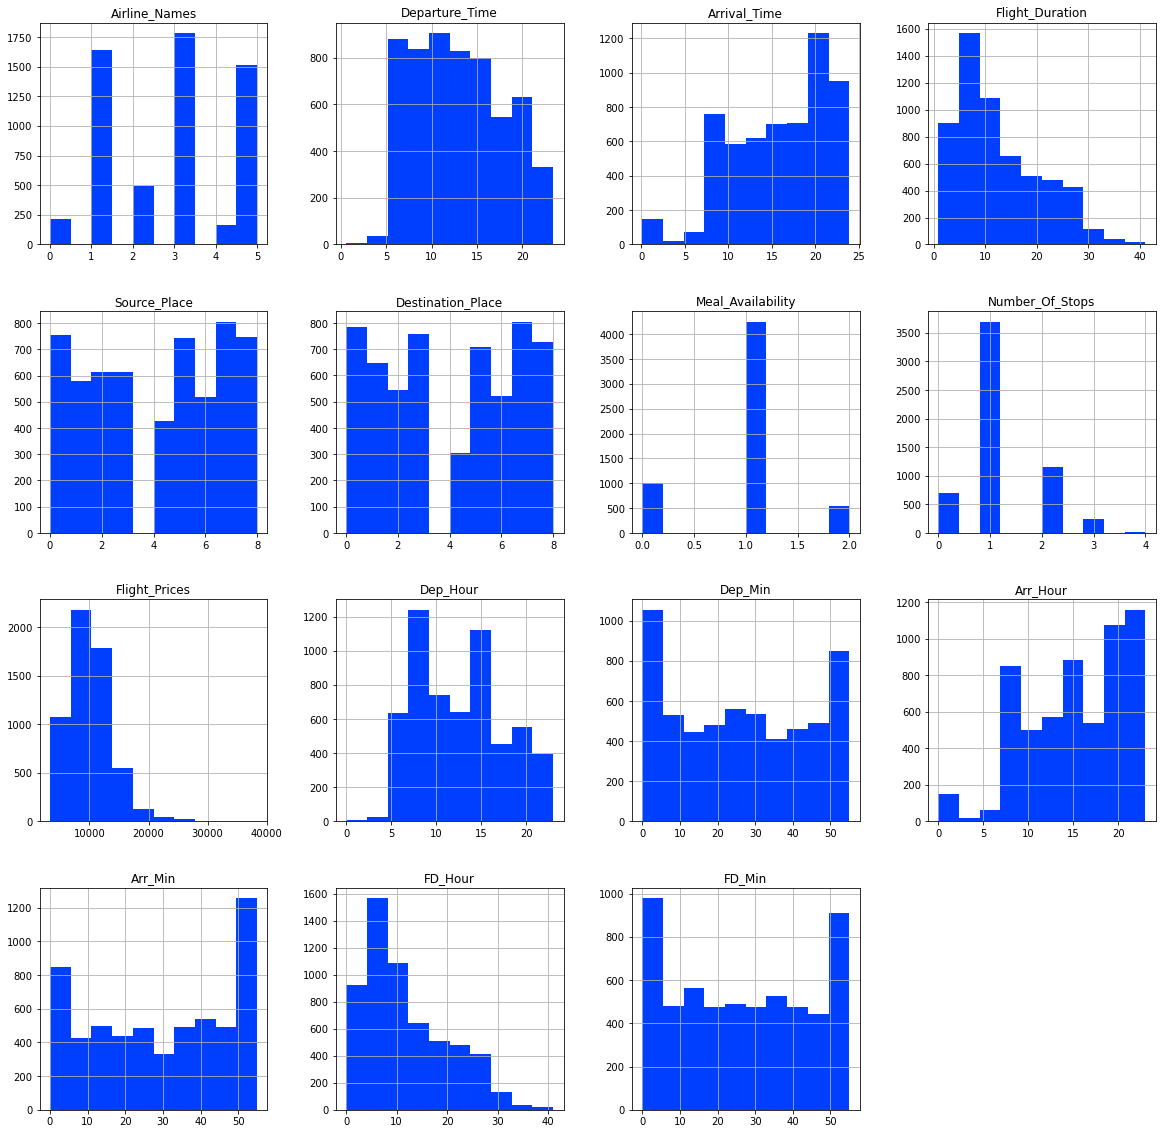

In [34]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,20))
plt.show()

# Correlation using a Heatmap



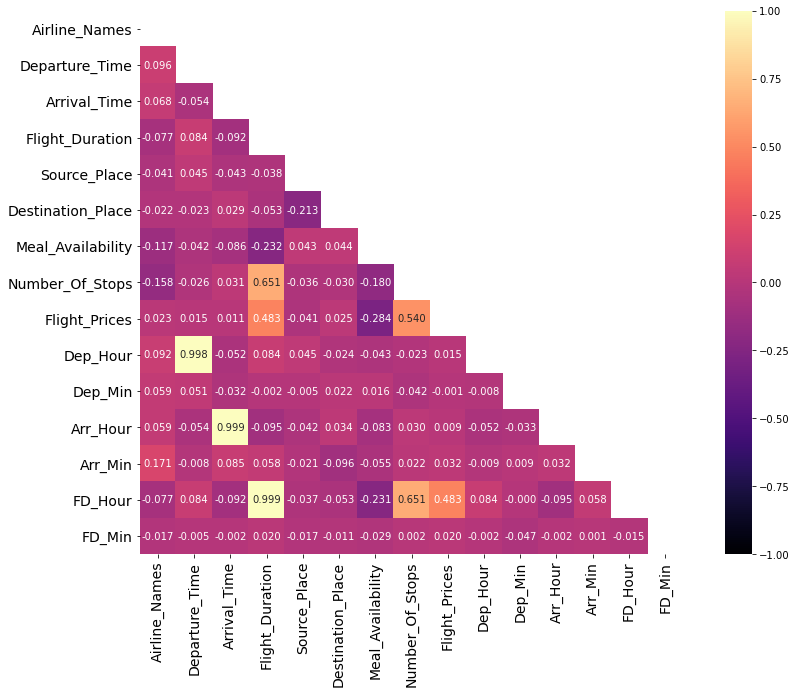

In [35]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="magma", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

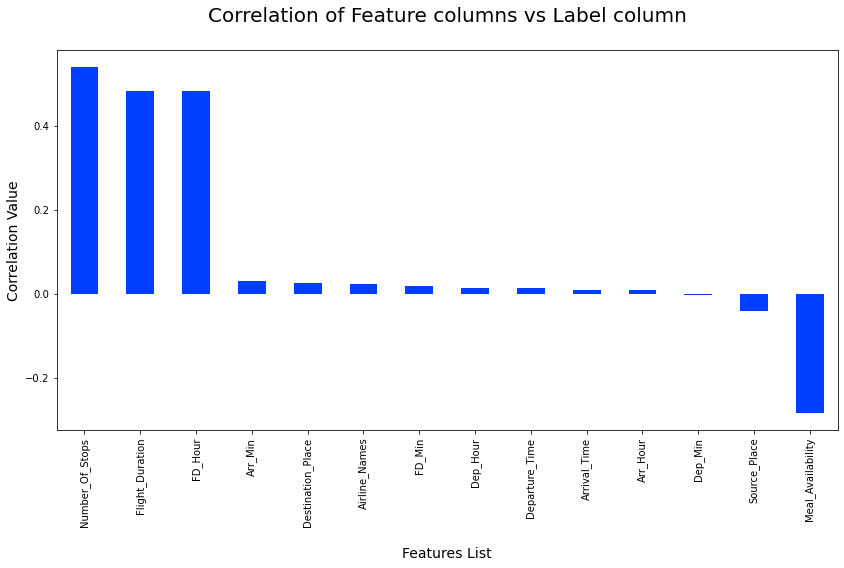

In [36]:
df_corr = df.corr()
plt.figure(figsize=(14,7))
df_corr['Flight_Prices'].sort_values(ascending=False).drop('Flight_Prices').plot.bar()
plt.title("Correlation of Feature columns vs Label column\n", fontsize=20)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=14)
plt.show()

# Outliers

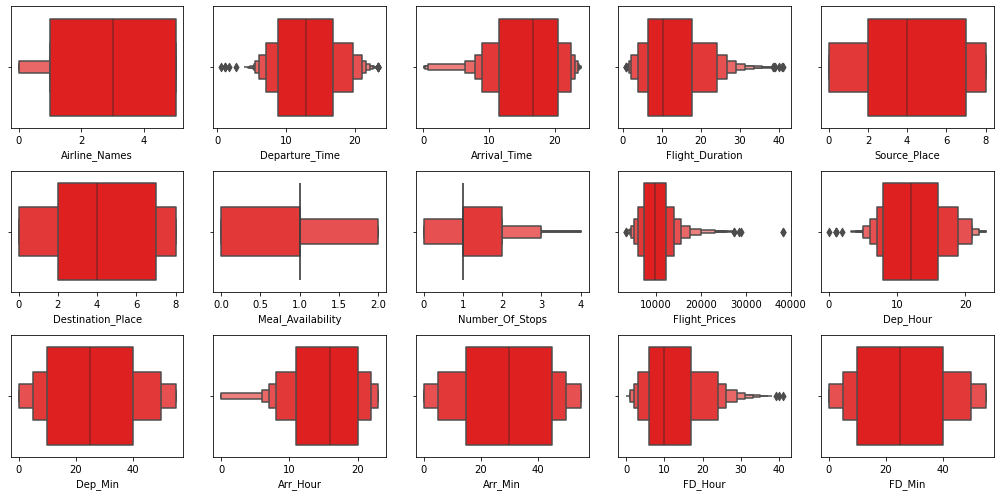

In [37]:
plt.figure(figsize=(14,7))
outl_df = df.columns.values
for i in range(0, len(outl_df)):
    plt.subplot(3, 5, i+1)
    ax = sns.boxenplot(df[outl_df[i]], color='red')
    plt.tight_layout()

# Skewness

In [38]:
df.skew()

Airline_Names        0.097880
Departure_Time       0.214262
Arrival_Time        -0.544907
Flight_Duration      0.736637
Source_Place        -0.069663
Destination_Place   -0.024310
Meal_Availability   -0.129523
Number_Of_Stops      0.721570
Flight_Prices        1.055364
Dep_Hour             0.221858
Dep_Min              0.059660
Arr_Hour            -0.526934
Arr_Min             -0.142671
FD_Hour              0.736539
FD_Min               0.041972
dtype: float64

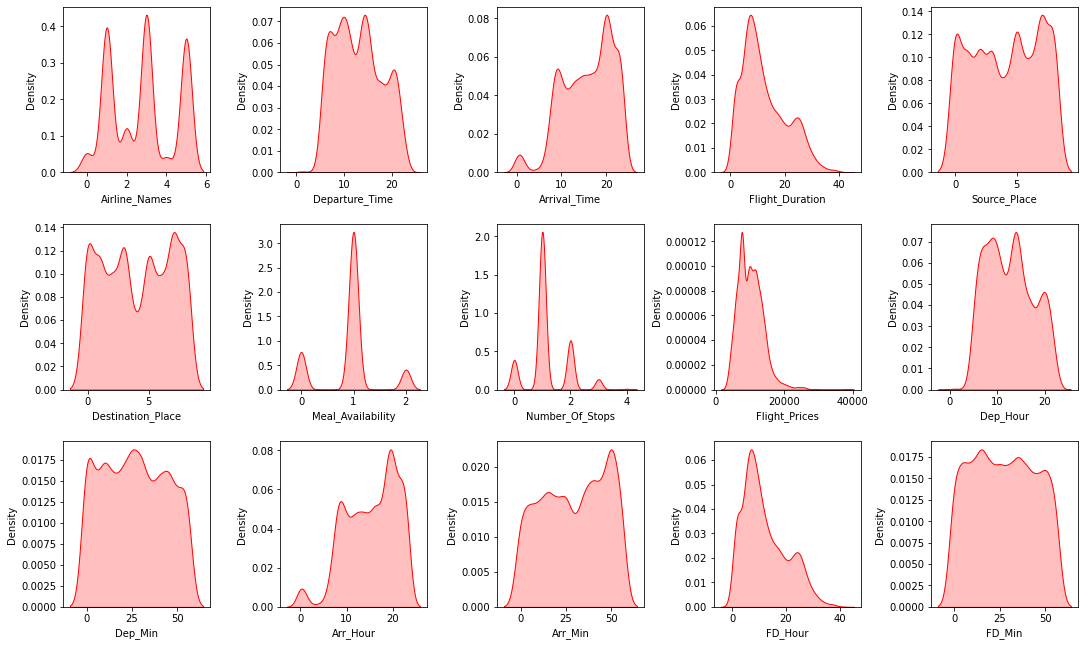

In [39]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15,9))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=2.0)
plt.show()

In [40]:
X = df.drop('Flight_Prices', axis=1)
Y = df['Flight_Prices']

# Finding the best random state for building Regression Models

In [41]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu*100,"on Random State", maxRS)

Best R2 score is 41.44799084752706 on Random State 3


Importance
Features                     
Number_Of_Stops         0.228
Flight_Duration         0.164
Airline_Names           0.089
Meal_Availability       0.089
Destination_Place       0.067
Source_Place            0.064
Departure_Time          0.061
Arrival_Time            0.056
Dep_Min                 0.046
Arr_Min                 0.038
FD_Min                  0.031
FD_Hour                 0.026
Arr_Hour                0.021
Dep_Hour                0.020

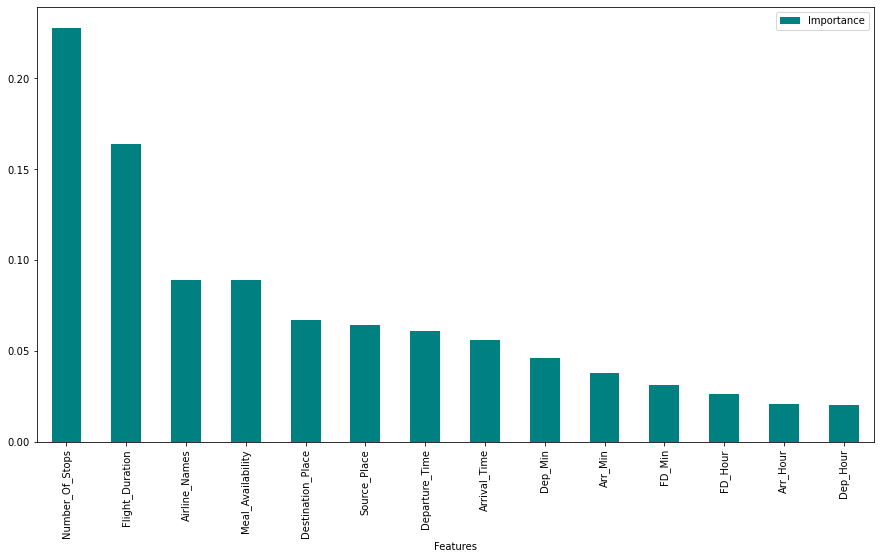

In [42]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
plt.rcParams["figure.figsize"] = (15,8)
importances.plot.bar(color='teal')
importances

# Machine Learning Model for Regression with Evaluation Metrics

In [43]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=638)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [44]:
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 2741.9813315300007
R2 Score is: 41.306757603032466
Cross Validation Score: 33.95569338340015
R2 Score - Cross Validation Score is 7.351064219632313


In [45]:
model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 2743.4497644670882
R2 Score is: 41.24387594331852
Cross Validation Score: 33.96445373909664
R2 Score - Cross Validation Score is 7.279422204221881


In [ ]:
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 2672.571769957153
R2 Score is: 44.24062873022401


In [ ]:
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

In [ ]:
fmod_param = {'n_estimators' : [100, 200, 300],
              'criterion' : ['squared_error', 'mse', 'absolute_error', 'mae'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 251, 340]
             }

GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)

In [47]:
Final_Model = ExtraTreesRegressor(criterion='mae', n_estimators=300, n_jobs=-2, random_state=251)
Model_Training = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 72.4377190016525


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it.

# Prediction of Flight Prices

In [48]:
Predicted_Price = Final_Model.predict(X)
# Checking the predicted price details in dataframe format
predicted_output = pd.DataFrame()
predicted_output['Flight Price Predicted'] = Predicted_Price
predicted_output['Flight Price Actual'] = df["Flight_Prices"]
predicted_output

Flight Price Predicted  Flight Price Actual
0                5953.000000               5953.0
1                5953.000000               5953.0
2                5965.956667               5953.0
3                5590.056667               5954.0
4                5954.086667               5954.0
...                      ...                  ...
5800             9284.330000               9302.0
5801            16865.000000              16287.0
5802            16865.000000              16865.0
5803            16865.000000              16865.0
5804            19749.000000              19749.0

[5805 rows x 2 columns]

In [49]:
filename = "FlightPricePrediction.pkl"
joblib.dump(Final_Model, filename)

['FlightPricePrediction.pkl']